In [1]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[IP].src == '172.27.224.70' and pkt[IP].dst == '172.27.224.250' and pkt[TCP].dport == 502 and len(pkt[TCP].payload)>0):
                hmi_cube.append(d_time)
            if(pkt[IP].src == '172.27.224.250' and pkt[IP].dst == '172.27.224.70' and pkt[TCP].sport == 502 and len(pkt[TCP].payload)>0):
                plc_cube.append(d_time)

In [4]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='/Users/AB/ics-anomalies/captures1_v2/clean/eth2dump-clean-0,5h_1.pcap', prn=packet_analysis, store=0)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [5]:
print(hmi_cube.shape)
print(plc_cube.shape)
print(hmi_cube)
#print(plc_cube[2][0])
#dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('172.27.224.70')]]
#dst2 = dst1[dst1[:,1]==[ip2long('172.27.224.250')]]
normal_hmi = hmi_cube
print(normal_hmi)

(5744,)
(5751,)
[1.53504605e+09 1.53504605e+09 1.53504605e+09 ... 1.53504785e+09
 1.53504785e+09 1.53504785e+09]
[1.53504605e+09 1.53504605e+09 1.53504605e+09 ... 1.53504785e+09
 1.53504785e+09 1.53504785e+09]


In [6]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[IP].src == '172.27.224.50' and pkt[IP].dst == '172.27.224.250' and pkt[TCP].dport == 502 and len(pkt[TCP].payload)>0):
                hmi_cube.append(d_time)
            if(pkt[IP].src == '172.27.224.250' and pkt[IP].dst == '172.27.224.50' and pkt[TCP].sport == 502 and len(pkt[TCP].payload)>0):
                plc_cube.append(d_time)

In [8]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='/Users/AB/ics-anomalies/captures1_v2/modbusQuery2Flooding/eth2dump-modbusQuery2Flooding1m-0,5h_1.pcap', prn=packet_analysis, store=0)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [9]:
print(hmi_cube.shape)
print(plc_cube.shape)
attack_hmi = hmi_cube

(8924,)
(12614,)


In [10]:
print("normal HMI",normal_hmi.shape)
print("attack HMI",attack_hmi.shape)
print(max(normal_hmi)-min(normal_hmi))
print(max(attack_hmi)-min(attack_hmi))

normal HMI (5744,)
attack HMI (8924,)
1799.5926818847656
60.08139491081238


In [11]:
normal_hmi_diff = np.diff(normal_hmi)
#normal_plc_diff = np.diff(normal_plc)
attack_hmi_diff = np.diff(attack_hmi)
#attack_plc_diff = np.diff(attack_plc)
print(normal_hmi_diff.shape)
print(attack_hmi_diff.shape)
print(max(normal_hmi_diff))
print(min(normal_hmi_diff))

(5743,)
(8923,)
4.76642918586731
0.23211383819580078


/Users/AB/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0.9999999999999991
1.0000000000000002


NameError: name 'peak_widths' is not defined

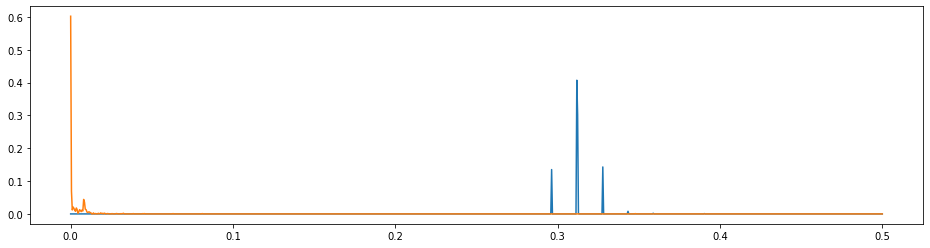

In [12]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example
for k in range(10):
    
    maxrange = 0.5
    N = 1000
    fold = k*N
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
    #                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    X = normal_hmi_diff[fold:fold+N].reshape(-1,1)
    X_beta = attack_hmi_diff[fold:fold+N].reshape(-1,1)
    X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
    #             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

    hist, bin_edges = np.histogram(normal_hmi_diff[fold:fold+N], bins=N, range=(0.0,maxrange), density=True)
    bin_edges = bin_edges[:-1]
    true_dens = hist[:]*maxrange*(1/N)
    #print(true_dens)
    print(np.sum(true_dens))

    _hist, _bin_edges = np.histogram(attack_hmi_diff[fold:fold+N], bins=N, range=(0.0,maxrange), density=True)
    _bin_edges = _bin_edges[:-1]
    _true_dens = _hist[:]*maxrange*(1/N)
    #print(_true_dens)
    print(np.sum(_true_dens))

    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution')
    ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution')

    kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
    log_dens = kde.score_samples(X_plot)
    dens = np.exp(log_dens)/1000
    peaks, _ = find_peaks(dens, height=0.001)
    valleys = peak_widths(dens, peaks, rel_height=0.8)

    _kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
    _log_dens = _kde.score_samples(X_plot)
    _dens = np.exp(_log_dens)/1000
    _peaks, __ = find_peaks(_dens, height=0.001)
    _valleys = peak_widths(_dens, _peaks, rel_height=0.8)

    ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
            linestyle='-', label="kernel = '{0}'".format('gaussian'))
    ax.plot(X_plot[peaks],dens[peaks], "x")
    ax.plot(valleys[2]*maxrange*(1/N),valleys[1], "go")
    ax.plot(valleys[3]*maxrange*(1/N),valleys[1], "go")
    
    ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
            linestyle='-', label="kernel = '{0}'".format('gaussian'))
    ax.plot(X_plot[_peaks],_dens[_peaks], "bx")
    ax.plot(_valleys[2]*maxrange*(1/N),_valleys[1], "ro")
    ax.plot(_valleys[3]*maxrange*(1/N),_valleys[1], "ro")
    
    print(dens[peaks])
    print(_dens[_peaks])
    #ax.text(6, 0.38, "N={0} points".format(N))
    ax.legend(loc='upper right')
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-0.0, maxrange)
    ax.set_ylim(-0.02, 0.6)


1.0000000000000002
[5.17326074e-01 1.86286278e-02 6.55736124e-02 2.24544569e-03
 2.40629321e-03 1.24185739e-03 1.05080009e-03 6.89929683e-04
 7.54027232e-04 8.65933973e-04 5.78881780e-04 3.42830548e-04
 3.49355255e-04 3.12357163e-04 2.18444457e-04 1.76350891e-04
 9.03558873e-05 9.03098211e-05 1.53911215e-04 8.94194831e-05
 8.89520082e-05 1.74448926e-04 8.93463668e-05 8.94045245e-05
 8.93985161e-05 8.87371804e-05 8.89892316e-05 8.93815459e-05
 8.92446349e-05]
[4.44609852e-01 1.58241767e-02 2.48233745e-02 2.19227036e-03
 1.54672970e-03 1.14205070e-03 1.04790834e-03 4.55970715e-04
 6.92278605e-04 4.64308035e-04 5.47796260e-04 2.25816328e-04
 1.93954317e-04 2.04042485e-04 5.97384263e-05 4.71569343e-05
 2.89653512e-05 6.32727104e-05 3.10753221e-05 3.04170628e-05
 5.45620173e-05 3.48920900e-05 5.28197623e-05 1.78809049e-05
 1.78797375e-05 1.77474361e-05 1.77978463e-05 1.78763092e-05
 1.78489270e-05]
(array([ 3.84100175,  7.85196587, 20.62685699,  3.52941052, 19.15968905,
        6.80050499, 

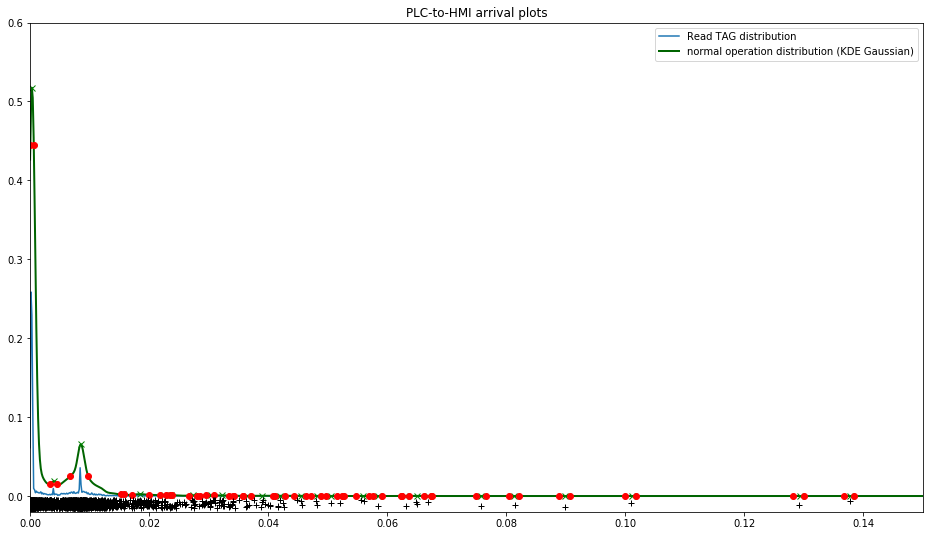

In [13]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, chirp, find_peaks, peak_widths

maxrange = 0.15
N = 1000
np.random.seed(1)

hmi_diff = attack_hmi_diff


X = hmi_diff[:9000].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]
hist, bin_edges = np.histogram(hmi_diff[:9000], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
print(np.sum(true_dens))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='Read TAG distribution')

kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
#print(kde.get_params())
dens = np.exp(log_dens)/1000

peaks, _ = find_peaks(dens)

valleys = peak_widths(dens, peaks, rel_height=0.8)

print(dens[peaks])
print(valleys[1])
print(valleys)
print("Xplot_peak",X_plot[peaks])
ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
        linestyle='-', label='normal operation distribution (KDE Gaussian)')
ax.plot(X_plot[peaks],dens[peaks], "gx")
#ax.plot(X_plot[valleys],dens[valleys], "go")
ax.plot(valleys[2]*maxrange*(1/N),valleys[1], "ro")
ax.plot(valleys[3]*maxrange*(1/N),valleys[1], "ro")

#stack position and values
nppeaks = np.hstack((X_plot[peaks],dens[peaks].reshape(-1,1)))
npbounds = np.stack((valleys[2]*maxrange*(1/N),valleys[3]*maxrange*(1/N),valleys[1]), axis=-1)
print("normal peaks",nppeaks)
print("normal bounds",npbounds)
np.save("np_peaks_CRITIS.npy",nppeaks)
np.save("np_bounds_CRITIS.npy",npbounds)

ax.title.set_text("PLC-to-HMI arrival plots")
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.6)

s = X_plot[:, 0]
e = np.exp(log_dens)/1000
a = X
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

/Users/AB/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

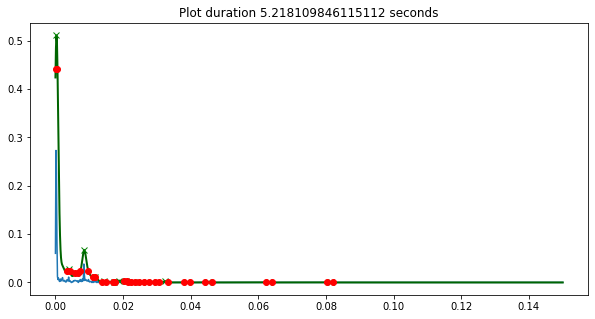

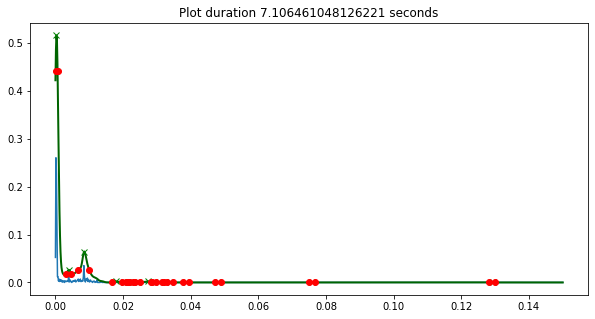

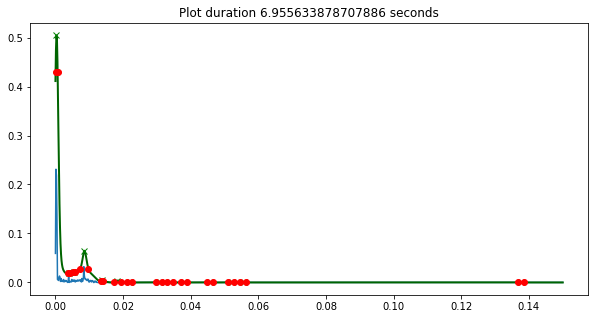

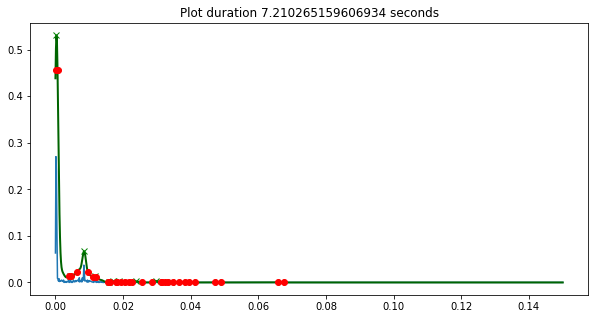

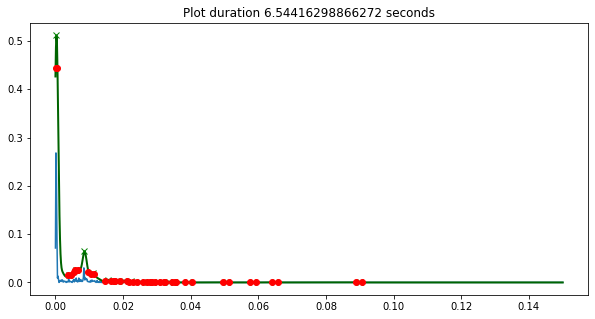

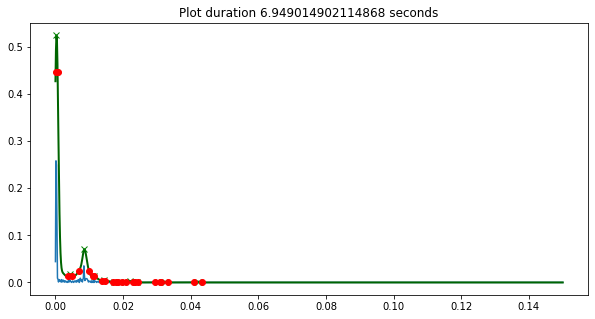

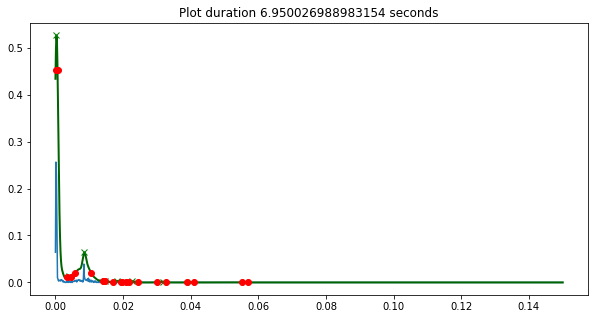

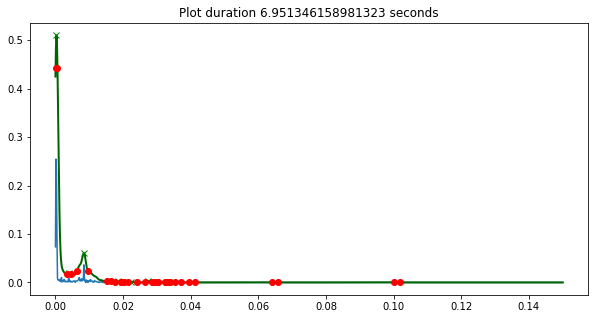

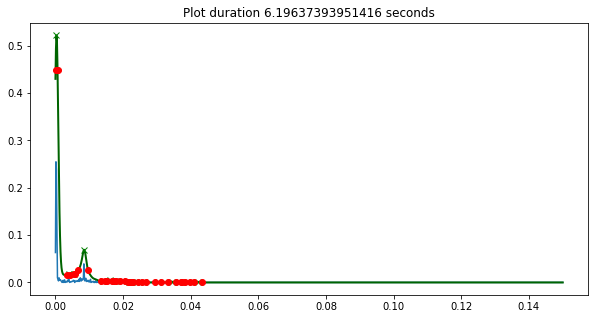

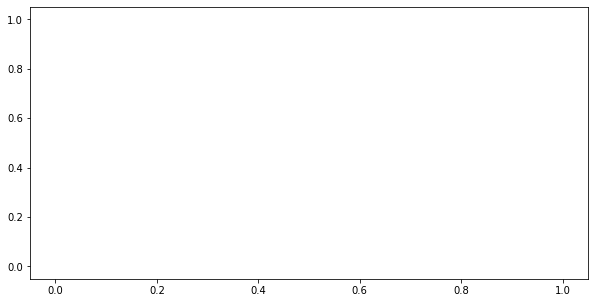

In [14]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, chirp, find_peaks, peak_widths

maxrange = 0.15
N = 1000
np.random.seed(1)


# Plot a 1D density example
for k in range(10):
    fold = k*N
    hmi_diff = attack_hmi_diff[fold:fold+N]
    
    X = hmi_diff.reshape(-1,1)
    X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]
    hist, bin_edges = np.histogram(hmi_diff, bins=N, range=(0.0,maxrange), density=True)
    bin_edges = bin_edges[:-1]
    true_dens = hist[:]*maxrange*(1/N)
    #print(np.sum(true_dens))

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(X_plot[:, 0], true_dens,label='Read TAG distribution')

    kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
    log_dens = kde.score_samples(X_plot)
    #print(kde.get_params())
    dens = np.exp(log_dens)/1000

    peaks, _ = find_peaks(dens)

    valleys = peak_widths(dens, peaks, rel_height=0.8)

    #print(dens[peaks])
    #print(valleys[1])
    #print(valleys)
    #print("Xplot_peak",X_plot[peaks])
    ax.title.set_text("Plot duration " + str(np.sum(hmi_diff)) + " seconds")
    ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
            linestyle='-', label='normal operation distribution (KDE Gaussian)')
    ax.plot(X_plot[peaks],dens[peaks], "gx")
    #ax.plot(X_plot[valleys],dens[valleys], "go")
    ax.plot(valleys[2]*maxrange*(1/N),valleys[1], "ro")
    ax.plot(valleys[3]*maxrange*(1/N),valleys[1], "ro")